In [37]:
import pandas as pd
import psycopg2
import psycopg2.extras
from psycopg2.extensions import AsIs
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

pd.set_option.max_columns = None

plt.style.use('ggplot')
plt.rc(
    'figure',
    autolayout=True,
    figsize=(11,4)
)

plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=20,
    titlepad=10
)



def data_extractor(asset,cols=['DCP','DNCP','OPCP','HPCP','LPCP','CPCP','ACPCP','VTCP','MPN5P']):
    # The credentials to conect to the database
    hostname = 'database-1.ctzm0hf7fhri.eu-central-1.rds.amazonaws.com'
    database = 'dyDATA_new'
    username = 'postgres'
    pwd = 'Proc2023awsrdspostgresql'
    port_id = 5432
    conn = None
    asset_script="SELECT * FROM "+'\"'+"ASSET_"+asset+'\"'+".features_targets_input_view WHERE features_targets_input_view."+'\"'+"cleaned_raw_features_environment_PK"+'\"'+ "= 4"
    # Here we select the active financial asset from the financial asset list table
    try:
        with psycopg2.connect(
            host = hostname,
            dbname = database,
            user = username,
            password = pwd,
            port = port_id
        ) as conn:
            dataframe = pd.read_sql(asset_script,conn)
    except Exception as error:
        conn.close()
        return error
    finally:
        if conn is not None:
            conn.close()
    dataframe = dataframe.filter(regex='|'.join(cols),axis=1)
    
    for i,j in zip(cols,dataframe.columns):
        dataframe.rename(columns={j:i},inplace=True)

    return dataframe

In [38]:
df = data_extractor(asset='MSFT')
df['DCP'] = pd.to_datetime(df['DCP'])
df.set_index('DCP',inplace=True)

df.head()

/tmp/ipykernel_5692/3988927883.py:47: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe = pd.read_sql(asset_script,conn)


,DNCP,OPCP,HPCP,LPCP,CPCP,ACPCP,VTCP,MPN5P
DCP,,,,,,,,
2000-01-03,36528.0,58.68750,59.3125,56.00000,58.28125,36.282272,53228400.0,56.125000
2000-01-04,36529.0,56.78125,58.5625,56.12500,56.31250,35.056644,54119000.0,55.718750
2000-01-05,36530.0,55.56250,58.1875,54.68750,56.90625,35.426260,64059600.0,55.476562
2000-01-06,36531.0,56.09375,56.9375,54.18750,55.00000,34.239563,54976600.0,54.437500
2000-01-07,36532.0,54.31250,56.1250,53.65625,55.71875,34.687000,62013600.0,54.437500


In [39]:
today = datetime.today().strftime('%Y-%m-%-d')

train_end = '2021-12-31'
validation_end = '2022-12-31'
test_end = today 

train = df.loc[:train_end,:]
validation = df.loc[train_end:validation_end,:].drop(train_end)
test = df.loc[validation_end:test_end]

<Axes: xlabel='DCP'>

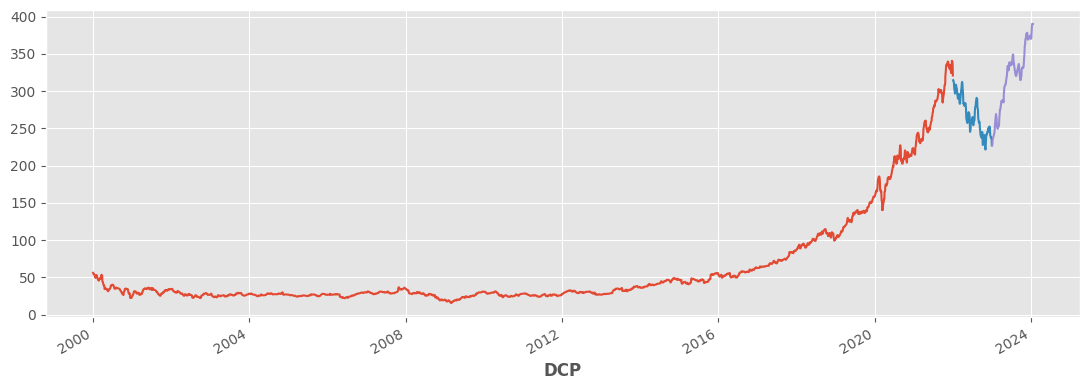

In [43]:
ax = train['MPN5P'].plot()

validation['MPN5P'].plot(ax=ax)
test['MPN5P'].plot(ax=ax)

In [41]:
ax =

SyntaxError: invalid syntax (599385449.py, line 1)